In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [91]:
#Basic Data Inspection

In [92]:
# Load the TSV file into a DataFrame
file_path = r"C:\Users\dileb\Downloads\Project4\Team_BioByte\GSE139495_Single_cell_metaData_10252019.tsv\GSE139495_Single_cell_metaData_10252019.tsv"
df.head(10)


,cells,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,alra_snn_res.0.5,seurat_clusters,samples
0,ACAGCTAAGGGTTCCC,Unfiltered_control,-1.525856,-2.083796,-2.249636,9,9,Unfiltered_control
1,ACATACGTCATTTGGG,Unfiltered_control,-1.525856,-2.078314,-2.220354,9,9,Unfiltered_control
2,ACATCAGAGTCGTACT,Unfiltered_control,-1.524220,-2.080141,-2.249636,9,9,Unfiltered_control
3,AGAGTGGGTGCAACTT,Unfiltered_control,-1.525856,-2.083796,-2.127051,9,9,Unfiltered_control
4,AGGCCACGTTCGCGAC,Unfiltered_control,-1.525038,-2.087451,-2.249636,9,9,Unfiltered_control
5,AGTGGGACATCCGGGT,Unfiltered_control,-1.525038,-2.083796,-2.249636,9,9,Unfiltered_control
6,ATCACGAGTCCAGTTA,Unfiltered_control,-1.525447,-2.076486,-2.249636,9,9,Unfiltered_control
7,ATCATGGGTCCGACGT,3,-1.525038,-2.076486,-2.249636,9,9,Filtered_samples
8,ATTACTCCAGATCTGT,Unfiltered_control,-1.523810,-2.081969,-2.249636,9,9,Unfiltered_control
9,CAAGATCGTCCATCCT,3,-1.523401,-2.081969,-2.249636,9,9,Filtered_samples


In [93]:
# Display basic information about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cells             12330 non-null  object  
 1   orig.ident        12330 non-null  category
 2   nCount_RNA        12330 non-null  float64 
 3   nFeature_RNA      12330 non-null  float64 
 4   percent.mt        12330 non-null  float64 
 5   alra_snn_res.0.5  12330 non-null  category
 6   seurat_clusters   12330 non-null  category
 7   samples           12330 non-null  category
dtypes: category(4), float64(3), object(1)
memory usage: 435.4+ KB
None


In [94]:
# Display summary statistics
print(df.describe())

         nCount_RNA  nFeature_RNA    percent.mt
count  1.233000e+04  1.233000e+04  1.233000e+04
mean   7.376275e-17  3.688137e-17  1.659662e-16
std    1.000041e+00  1.000041e+00  1.000041e+00
min   -1.526675e+00 -2.089278e+00 -2.249636e+00
25%   -6.099917e-01 -7.132812e-01 -6.770391e-01
50%   -1.430562e-01 -4.995209e-02 -1.643798e-01
75%    3.226516e-01  4.557678e-01  5.330850e-01
max    1.671041e+01  7.120581e+00  3.846080e+00


In [95]:
#Check for missing values
print(df.isnull().sum())

cells               0
orig.ident          0
nCount_RNA          0
nFeature_RNA        0
percent.mt          0
alra_snn_res.0.5    0
seurat_clusters     0
samples             0
dtype: int64


In [99]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

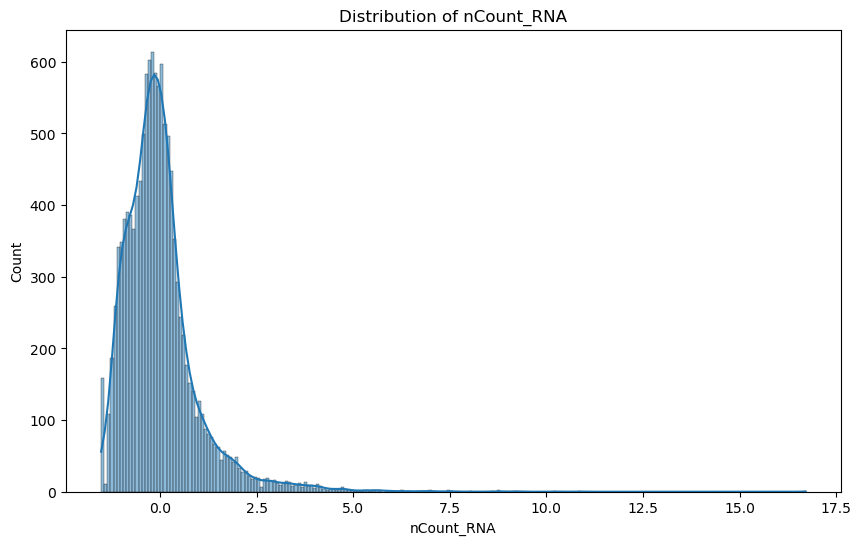

In [100]:
# Plot the distribution of a specific column 
plt.figure(figsize=(10, 6))
sns.histplot(df['nCount_RNA'], kde=True)
plt.title('Distribution of nCount_RNA')
plt.show()


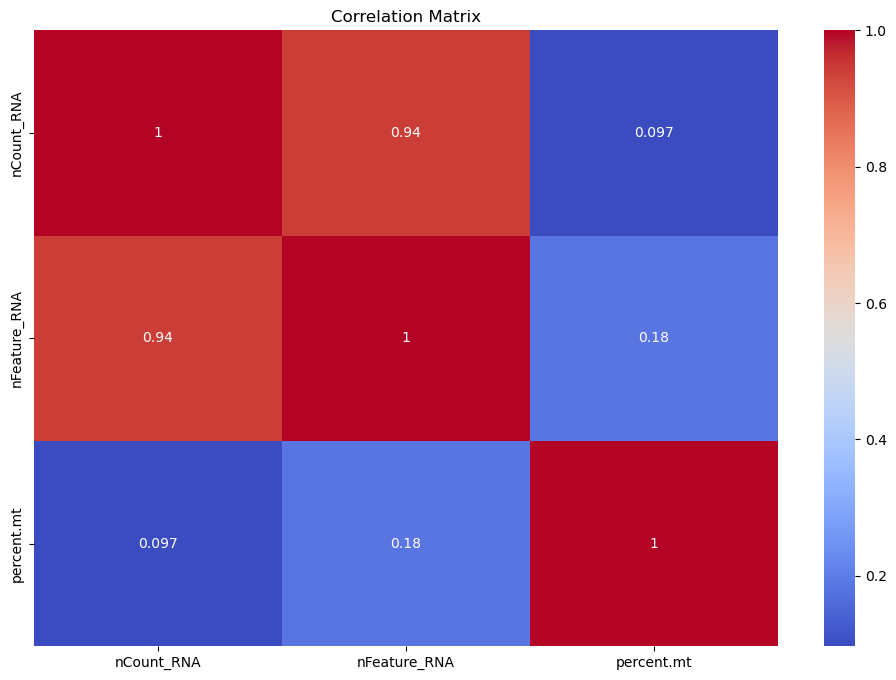

In [104]:
# Select only numeric columns
df = df.select_dtypes(include=[float, int])

# Plot a correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Model Training and Evaluation:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = df.drop('target_column', axis=1)
y = df['target_column']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [39]:
# Convert categorical columns to category data type
categorical_columns = ['orig.ident', 'alra_snn_res.0.5', 'seurat_clusters', 'samples']
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [40]:
# Normalize numerical columns
numerical_columns = ['nCount_RNA', 'nFeature_RNA', 'percent.mt']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [22]:
# Recode categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [41]:
# Display the transformed DataFrame
print(df.head(10))

              cells          orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
0  ACAGCTAAGGGTTCCC  Unfiltered_control   -1.525856     -2.083796   -2.249636   
1  ACATACGTCATTTGGG  Unfiltered_control   -1.525856     -2.078314   -2.220354   
2  ACATCAGAGTCGTACT  Unfiltered_control   -1.524220     -2.080141   -2.249636   
3  AGAGTGGGTGCAACTT  Unfiltered_control   -1.525856     -2.083796   -2.127051   
4  AGGCCACGTTCGCGAC  Unfiltered_control   -1.525038     -2.087451   -2.249636   
5  AGTGGGACATCCGGGT  Unfiltered_control   -1.525038     -2.083796   -2.249636   
6  ATCACGAGTCCAGTTA  Unfiltered_control   -1.525447     -2.076486   -2.249636   
7  ATCATGGGTCCGACGT                   3   -1.525038     -2.076486   -2.249636   
8  ATTACTCCAGATCTGT  Unfiltered_control   -1.523810     -2.081969   -2.249636   
9  CAAGATCGTCCATCCT                   3   -1.523401     -2.081969   -2.249636   

  alra_snn_res.0.5 seurat_clusters             samples  
0                9               9  Unfiltered_cont

In [42]:
# Initialize and train the logistic regression model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [61]:
# Prepare features and labels
X = df[['nCount_RNA', 'nFeature_RNA', 'percent.mt']]
y = df['orig.ident']

In [62]:
df.dtypes

cells                 object
orig.ident          category
nCount_RNA           float64
nFeature_RNA         float64
percent.mt           float64
alra_snn_res.0.5    category
seurat_clusters     category
samples             category
dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cells             12330 non-null  object  
 1   orig.ident        12330 non-null  category
 2   nCount_RNA        12330 non-null  float64 
 3   nFeature_RNA      12330 non-null  float64 
 4   percent.mt        12330 non-null  float64 
 5   alra_snn_res.0.5  12330 non-null  category
 6   seurat_clusters   12330 non-null  category
 7   samples           12330 non-null  category
dtypes: category(4), float64(3), object(1)
memory usage: 435.4+ KB


In [64]:
# Convert labels to numeric values if necessary
y = y.astype('category').cat.codes

In [65]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
# Make predictions
y_pred = model.predict(X_test)

In [68]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.60      0.77      0.67       308
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00       141
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           8       0.54      0.19      0.29       221
          10       0.84      0.97      0.90      1720

    accuracy                           0.79      2466
   macro avg       0.22      0.21      0.21      2466
weighted avg       0.71      0.79      0.74      2466

Confusion Matrix:
 [[   0   36    0    0    0    0    0   11   20]
 [   0  236    0    0    0    0    0    9   63]
 [   0    1    0    0    0    0    0    0    3]
 [   0   29    0    0    0    0    0    2  110]
 [   0    1    0    0    0    0    0    0    0]
 [   0    3 

C:\Users\dileb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dileb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dileb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [70]:
# Display the first few rows
df.head(10)

,cells,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,alra_snn_res.0.5,seurat_clusters,samples
0,ACAGCTAAGGGTTCCC,Unfiltered_control,-1.525856,-2.083796,-2.249636,9,9,Unfiltered_control
1,ACATACGTCATTTGGG,Unfiltered_control,-1.525856,-2.078314,-2.220354,9,9,Unfiltered_control
2,ACATCAGAGTCGTACT,Unfiltered_control,-1.524220,-2.080141,-2.249636,9,9,Unfiltered_control
3,AGAGTGGGTGCAACTT,Unfiltered_control,-1.525856,-2.083796,-2.127051,9,9,Unfiltered_control
4,AGGCCACGTTCGCGAC,Unfiltered_control,-1.525038,-2.087451,-2.249636,9,9,Unfiltered_control
5,AGTGGGACATCCGGGT,Unfiltered_control,-1.525038,-2.083796,-2.249636,9,9,Unfiltered_control
6,ATCACGAGTCCAGTTA,Unfiltered_control,-1.525447,-2.076486,-2.249636,9,9,Unfiltered_control
7,ATCATGGGTCCGACGT,3,-1.525038,-2.076486,-2.249636,9,9,Filtered_samples
8,ATTACTCCAGATCTGT,Unfiltered_control,-1.523810,-2.081969,-2.249636,9,9,Unfiltered_control
9,CAAGATCGTCCATCCT,3,-1.523401,-2.081969,-2.249636,9,9,Filtered_samples


In [71]:
# Prepare features for clustering
X = df[['nCount_RNA', 'nFeature_RNA', 'percent.mt']]

In [72]:
# Create lists to store inertia values and the corresponding values of k
inertia_values = []
k_values = range(1, 11)

In [73]:
# Create a for-loop to evaluate each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

In [74]:
# Create a DataFrame to hold the values for k and the corresponding inertia
inertia_df = pd.DataFrame({
    'k': k_values,
    'inertia': inertia_values
})

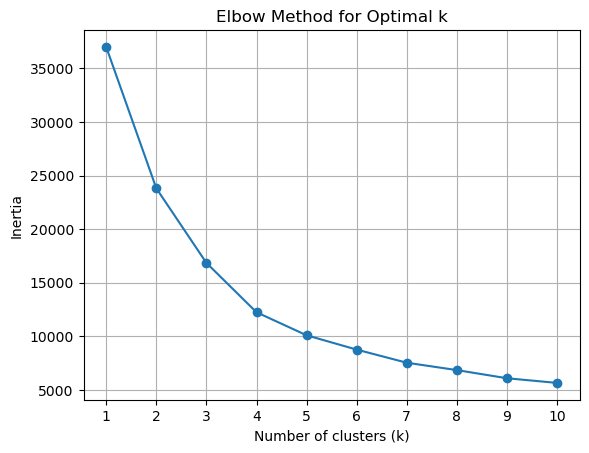

In [75]:
# Plot the values of k and the corresponding inertia
plt.plot(inertia_df['k'], inertia_df['inertia'], marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(inertia_df['k'])  # Ensure x-axis ticks match the k values
plt.grid(True)
plt.show()